In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check python version
import sys
sys.version

'3.7.10 (default, May  3 2021, 02:48:31) \n[GCC 7.5.0]'

In [ ]:
import pandas as pd
from time import time

In [ ]:
!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.7MB/s eta 0:11:21tcmalloc: large alloc 1147494400 bytes == 0x561c80126000 @  0x7f0a014bd615 0x561c47609cdc 0x561c476e952a 0x561c4760cafd 0x561c476fdfed 0x561c47680988 0x561c4767b4ae 0x561c4760e3ea 0x561c476807f0 0x561c4767b4ae 0x561c4760e3ea 0x561c4767d32a 0x561c476fee36 0x561c4767c853 0x561c476fee36 0x561c4767c853 0x561c476fee36 0x561c4767c853 0x561c476fee36 0x561c477813e1 0x561c476e16a9 0x561c4764ccc4 0x561c4760d559 0x561c476814f8 0x561c4760e30a 0x561c4767c3b5 0x561c4767b7ad 0x561c4760e3ea 0x561c4767c3b5 0x561c4760e30a 0x561c4767c3b5
     |█████████████████               | 1055.7MB 1.4MB/s eta 0:10:55tcmalloc: large alloc 1434370048 bytes == 0x561cc477c000 @  0x7f0a014bd615 0x561c47609cdc 0x561c476e952a 0x561c4760cafd 0x561c476fdfed 0x561c47680988 0x561c4767b4ae 0x561c4760e3ea 0x561c476807f0 0x561c4767b4ae 0x561c4760e3ea 0x561c4767d32a 0x561c476fee36 0x561c4767c853 0

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 4.1MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'

''

In [ ]:
from fastai.vision.all import *

In [ ]:
import fastai 
fastai.__version__

'2.4'

In [ ]:
path= '/content/drive/MyDrive/Colab Notebooks/Plant/'

In [ ]:
df = pd.read_csv(path+'train_comp.csv')
df.head()

,image,labels
0,Compressed_800113bb65efe69e.jpg,healthy
1,Compressed_8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,Compressed_80070f7fb5e2ccaa.jpg,scab
3,Compressed_80077517781fb94f.jpg,scab
4,Compressed_800cbf0ff87721f8.jpg,complex


In [ ]:
#splitter
splitter = RandomSplitter(valid_pct=0.33, seed=2021)

# DataBlock
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
        get_x=ColReader('image', pref=str(path+'train_images/') ),
        get_y=ColReader('labels', label_delim=' '), 
        splitter=splitter,
        item_tfms = Resize(460),
        batch_tfms=aug_transforms(mult=2, size=224, flip_vert=True))
dls = dblock.dataloaders(df)

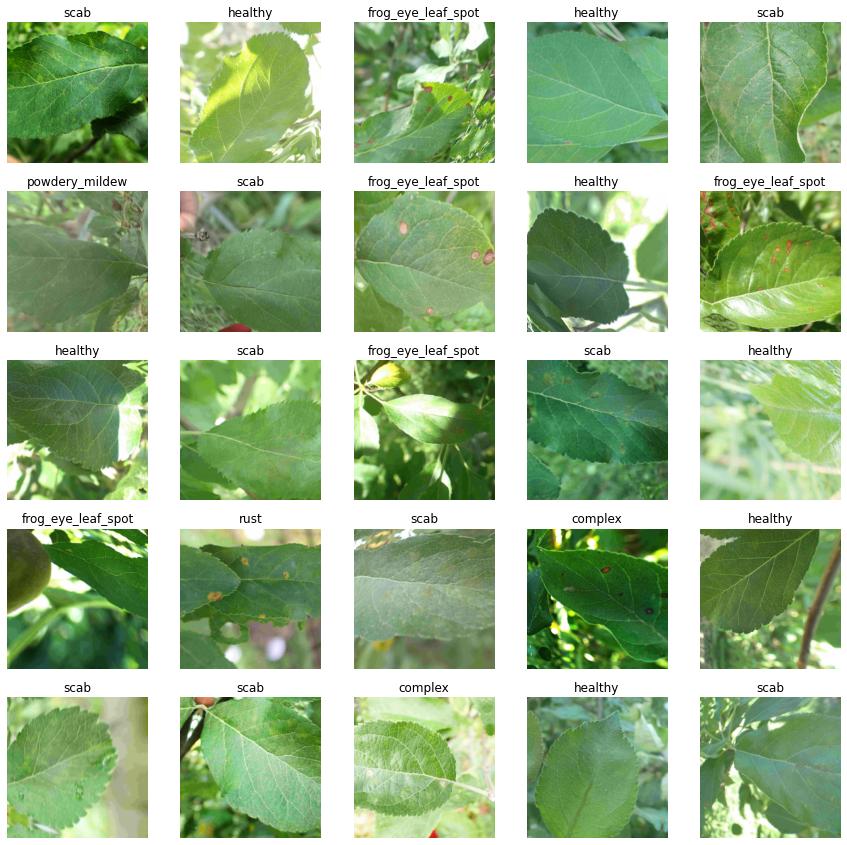

In [ ]:
dls.show_batch(max_n=25)

In [ ]:
debut= time()
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))
duree1 = time()- debut
print("durée 1 du training (en secondes) =", duree1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



durée 1 du training (en secondes) = 1.9207253456115723


SuggestedLRs(valley=tensor(0.0010))

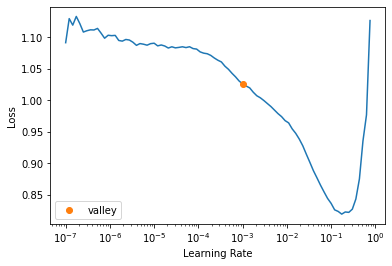

In [ ]:
debut= time()
learn.lr_find()

In [ ]:
duree2 = time()- debut
print("durée 2 : pour trouver le meilleur learning rate  (en secondes) =", duree2)

durée 2 : pour trouver le meilleur learning rate  (en secondes) = 1313.3020849227905


In [ ]:
debut= time()
learn.fine_tune(2, 1e-3)
duree3 = time()- debut

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.575513,0.315437,0.880069,3:25:00


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.243651,0.153241,0.942285,3:43:18


In [ ]:
print("durée 3 : fine tune  (en secondes) =", duree3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.243651,0.153241,0.942285,3:43:18


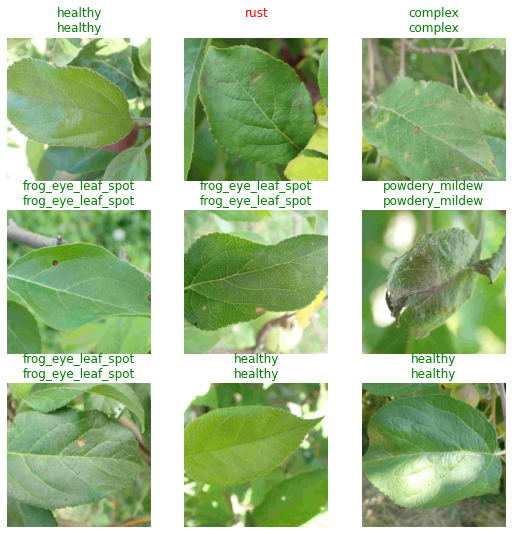

In [20]:
learn.show_results()

In [21]:
learn.dls.vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [22]:
# prévision pour la 1ère image du testing set
learn.predict(path+'test_images/85f8cb619c66b863.jpg')

((#0) [],
 tensor([False, False, False, False, False, False]),
 tensor([0.1067, 0.1727, 0.0109, 0.0192, 0.0190, 0.1903]))

In [23]:
# prévision pour la 2ème image du testing set
learn.predict(path+'test_images/ad8770db05586b59.jpg')

((#1) ['complex'],
 tensor([ True, False, False, False, False, False]),
 tensor([0.8379, 0.3519, 0.0112, 0.0195, 0.0193, 0.3494]))

In [24]:
# prévision pour la 3ème image du testing set
learn.predict(path+'test_images/c7b03e718489f3ca.jpg')

((#1) ['frog_eye_leaf_spot'],
 tensor([False,  True, False, False, False, False]),
 tensor([0.0595, 0.9912, 0.0233, 0.0038, 0.0362, 0.0100]))

In [25]:
# prévision pour les 3 images à la fois  du testing set
test_dl = dls.test_dl(get_image_files(path+'test_images')
                          .sorted())
                                                   
preds= learn.get_preds(dl=test_dl)

In [26]:
preds[0].numpy()

array([[0.1066912 , 0.17269413, 0.01089213, 0.01916133, 0.0190489 ,
        0.19033793],
       [0.8379358 , 0.35191604, 0.01117217, 0.01952825, 0.01927336,
        0.3493834 ],
       [0.05954283, 0.9911713 , 0.02328759, 0.00379909, 0.036159  ,
        0.0099967 ]], dtype=float32)

In [27]:
preds_round= preds[0].round()
preds_round

tensor([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [28]:
df_test=pd.DataFrame(preds_round, columns=['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab'])
df_test

,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
SUB_PATH = path+"sample_submission.csv"
test_data = pd.read_csv(SUB_PATH)
test_data

,image,labels
0,85f8cb619c66b863.jpg,healthy
1,ad8770db05586b59.jpg,healthy
2,c7b03e718489f3ca.jpg,healthy


In [30]:
# prévision pour les 3 images à la fois  du testing set

df_test['labels'] = df_test['healthy'].apply(lambda x:'healthy ' if x==1 else "") \
                        + df_test['scab'].apply(lambda x:'scab ' if x==1 else "") \
                        +  df_test['rust'].apply(lambda x:'rust ' if x==1 else "")  \
                          +   df_test['powdery_mildew'].apply(lambda x:'powdery_mildew ' if x==1 else "")  \
                          + df_test['frog_eye_leaf_spot'].apply(lambda x:'frog_eye_leaf_spot ' if x==1 else "") \
                         + df_test['complex'].apply(lambda x:'complex ' if x==1 else "") 
                                                                  
df_test['labels']= df_test['labels'].str.strip()
df_test['labels'] = df_test['labels'].apply(lambda x:'healthy' if x=="" else x)
test_data['labels']= df_test['labels']
print(test_data)

                  image              labels
0  85f8cb619c66b863.jpg             healthy
1  ad8770db05586b59.jpg             complex
2  c7b03e718489f3ca.jpg  frog_eye_leaf_spot


In [31]:
# submitting to kaggle competition
test_data.to_csv('submission.csv',index=False)

,target,predicted,probabilities,loss
0,healthy,powdery_mildew,"tensor([1.3805e-03, 1.1149e-03, 3.5708e-04, 1.0000e+00, 1.8896e-04, 2.0348e-03])",3.7165842056274414
1,scab,powdery_mildew,"tensor([4.8274e-04, 1.3285e-03, 3.4088e-04, 9.9997e-01, 1.8165e-04, 4.2339e-04])",3.0150163173675537
2,healthy,powdery_mildew,"tensor([3.5608e-03, 9.3465e-04, 3.7124e-04, 9.9991e-01, 3.5541e-04, 2.2995e-04])",2.870502471923828
3,healthy,powdery_mildew,"tensor([3.8428e-03, 1.1298e-03, 3.0360e-04, 9.9985e-01, 1.0530e-04, 7.1348e-04])",2.821270704269409
4,healthy,powdery_mildew,"tensor([1.0240e-03, 3.5642e-03, 3.2740e-04, 9.9833e-01, 2.2139e-04, 2.1981e-03])",2.4043142795562744
5,complex;frog_eye_leaf_spot;scab,rust,"tensor([0.2952, 0.0395, 0.0031, 0.0085, 0.9966, 0.0211])",2.334320306777954
6,frog_eye_leaf_spot;scab,rust,"tensor([0.2101, 0.0253, 0.0021, 0.0082, 0.9949, 0.0100])",2.30039644241333
7,complex,frog_eye_leaf_spot,"tensor([0.0052, 0.9996, 0.0045, 0.0086, 0.0014, 0.0142])",2.2008769512176514
8,complex,rust,"tensor([0.0651, 0.0086, 0.0072, 0.0126, 1.0000, 0.0012])",2.1562726497650146


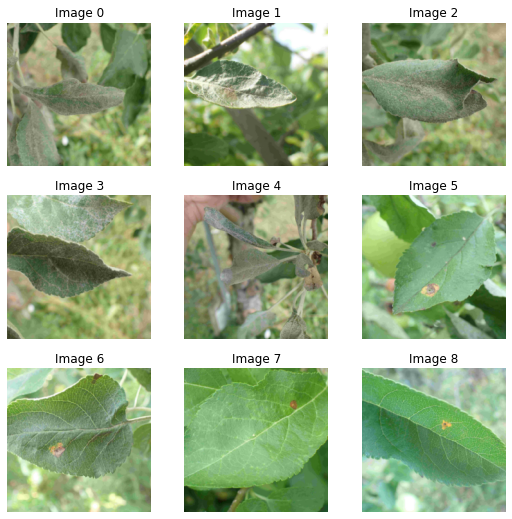

In [32]:
# les 9 plus mauvaises prédictions 
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)